## Train a neural network to predict a time series function

In [1]:
# Imports

import numpy as np

import matplotlib.pyplot as plt

from neuralnetwork.neural_network_module import NeuralNetwork, Layer
from neuralnetwork.neural_network_module import train_nn_regression, compute_loss

np.random.seed(101)

### Create and plot data series

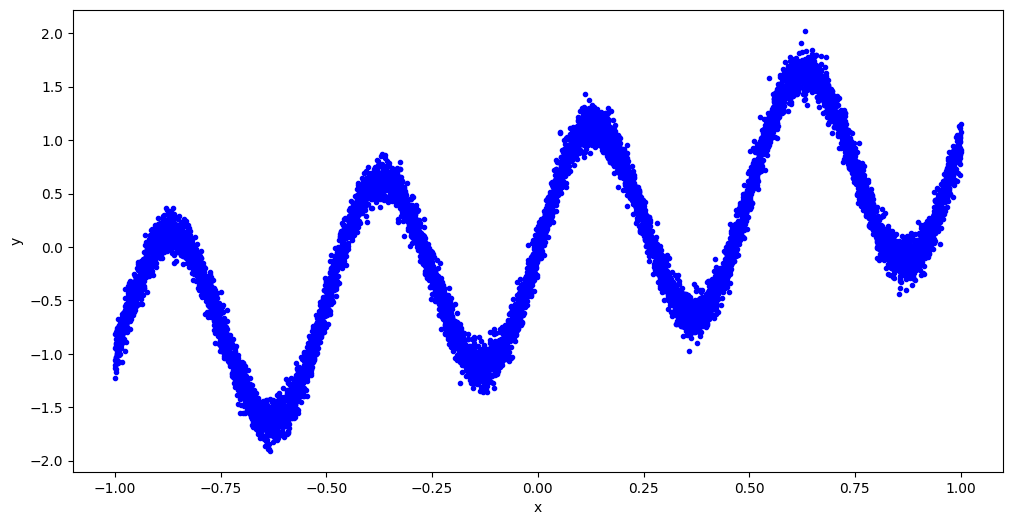

In [2]:
# Create data for sinusoid

N = int(1e4) # number of samples

f = 2 # sinusoid frequency

xx = 2*(np.random.rand(N) - 0.5) # independent variable

yy = xx + np.sin(2*np.pi*f*xx) + 0.10*np.random.randn(N) # create sinusoid and add Gaussian noise

# plot
plt.figure(figsize=(12,6))
# plt.plot(xx[:,0],yy[:,0])
plt.plot(xx,yy,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### Split data into training and test sets

In [3]:
# Reshape xx and yy, and split into training and test sets

# reshape xx and yy into Nx1 arrays
xx = xx.reshape(-1,1)
yy = yy.reshape(-1,1)

train_test_split = 0.8 # ratio of data for the training set, with (1 - train_test_split) going into the test set

# split into train and test sets
idx_train = range(0,int(train_test_split*xx.shape[0])) # training set indexes
X_train = xx[idx_train,:]
Y_train = yy[idx_train,:]

idx_test = range(int(train_test_split*xx.shape[0]),xx.shape[0]) # test set indexes
X_test = xx[idx_test,:]
Y_test = yy[idx_test,:]


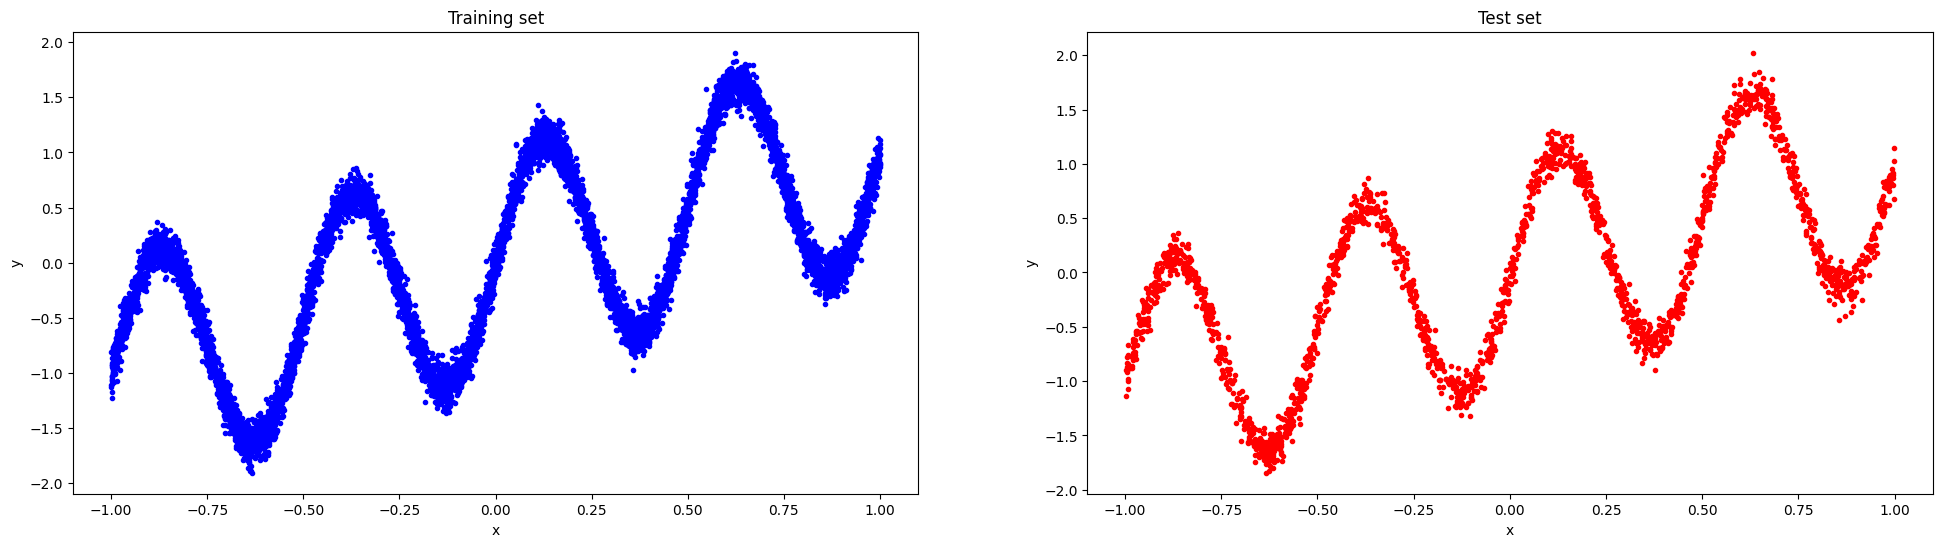

In [4]:
# Plot training and test sets

plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
plt.plot(X_train[:,0], Y_train[:,0], "b.")
plt.title("Training set")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,2,2)
plt.plot(X_test[:,0], Y_test[:,0], "r.")
plt.title("Test set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### Create functions for training neural network and assessing its performance

In [5]:
# Create functions to compute NN acuracy, and perform gradient descent

def get_loss(Y_pred, Y):
    return np.sum((Y_pred - Y)**2)/Y.size

# Gradient descent
def train_nn(NN: "NeuralNetwork", X, Y, alpha, iterations=1000, intervals=100):
    print(f"\nStarting training of {NN.name}")
    # iterate through data points
    for k1 in range(iterations):
        NN._compute_output(X) # make prediction for all data points
        NN._train_step(X, Y, alpha) # compute gradients and apply gradient descent
        Y_pred = NN._compute_output(X) # make prediction after gradient descent step
        if k1 % intervals == 0 or k1 == iterations:
            print(f"Iteration: {k1} | Train loss: {get_loss(Y_pred, Y):0.6f}")


### Create and train neural network and analyze its performance

In [6]:
# Create NN and train

# nn = NeuralNetwork()
# layer_list = []
# layer_list.append(Layer(1, None))
# layer_list.append(Layer(8, "linear"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(1, "tanh"))

nn = NeuralNetwork()
layer_list = []
layer_list.append(Layer(1, None)) # input layer
for k1 in range(0,8):
    layer_list.append(Layer(8, "tanh"))
layer_list.append(Layer(8, "linear")) # output layer
layer_list.append(Layer(1, "linear")) # output layer

nn._set_layers(layer_list) # set layer list

NN_list, train_loss, test_loss, epochs = train_nn_regression(nn, X_train, Y_train, 0.1, 5000, 1000, X_test, Y_test) # train NN

print("")
print("Training Complete")
print(f"Train loss: {compute_loss(nn._compute_output(X_train), Y_train):0.6f}")
print(f"Test loss: {compute_loss(nn._compute_output(X_test), Y_test):0.6f}")

Neural Network NN01 initialized
Layer L01 initialized | Neurons: 1 | Activation: linear
Layer L02 initialized | Neurons: 8 | Activation: tanh
Layer L03 initialized | Neurons: 8 | Activation: tanh
Layer L04 initialized | Neurons: 8 | Activation: tanh
Layer L05 initialized | Neurons: 8 | Activation: tanh
Layer L06 initialized | Neurons: 8 | Activation: tanh
Layer L07 initialized | Neurons: 8 | Activation: tanh
Layer L08 initialized | Neurons: 8 | Activation: tanh
Layer L09 initialized | Neurons: 8 | Activation: tanh
Layer L10 initialized | Neurons: 8 | Activation: linear
Layer L11 initialized | Neurons: 1 | Activation: linear
NN01 added layer L01 with 1 neurons and linear activation
NN01 added layer L02 with 8 neurons and tanh activation
NN01 added layer L03 with 8 neurons and tanh activation
NN01 added layer L04 with 8 neurons and tanh activation
NN01 added layer L05 with 8 neurons and tanh activation
NN01 added layer L06 with 8 neurons and tanh activation
NN01 added layer L07 with 8 ne

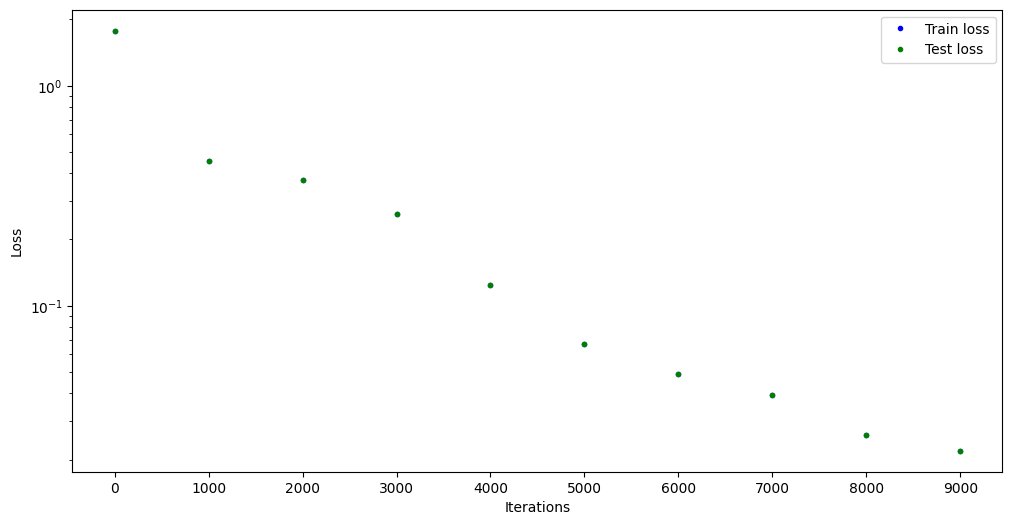

In [9]:
# Plot training and test loss across training epochs

plt.figure(figsize=(12,6))
plt.semilogy(epochs, train_loss, 'b.', label="Train loss")
if len(test_loss) == len(epochs):
    plt.semilogy(epochs, test_loss, 'g.', label="Test loss")
plt.xticks(epochs)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

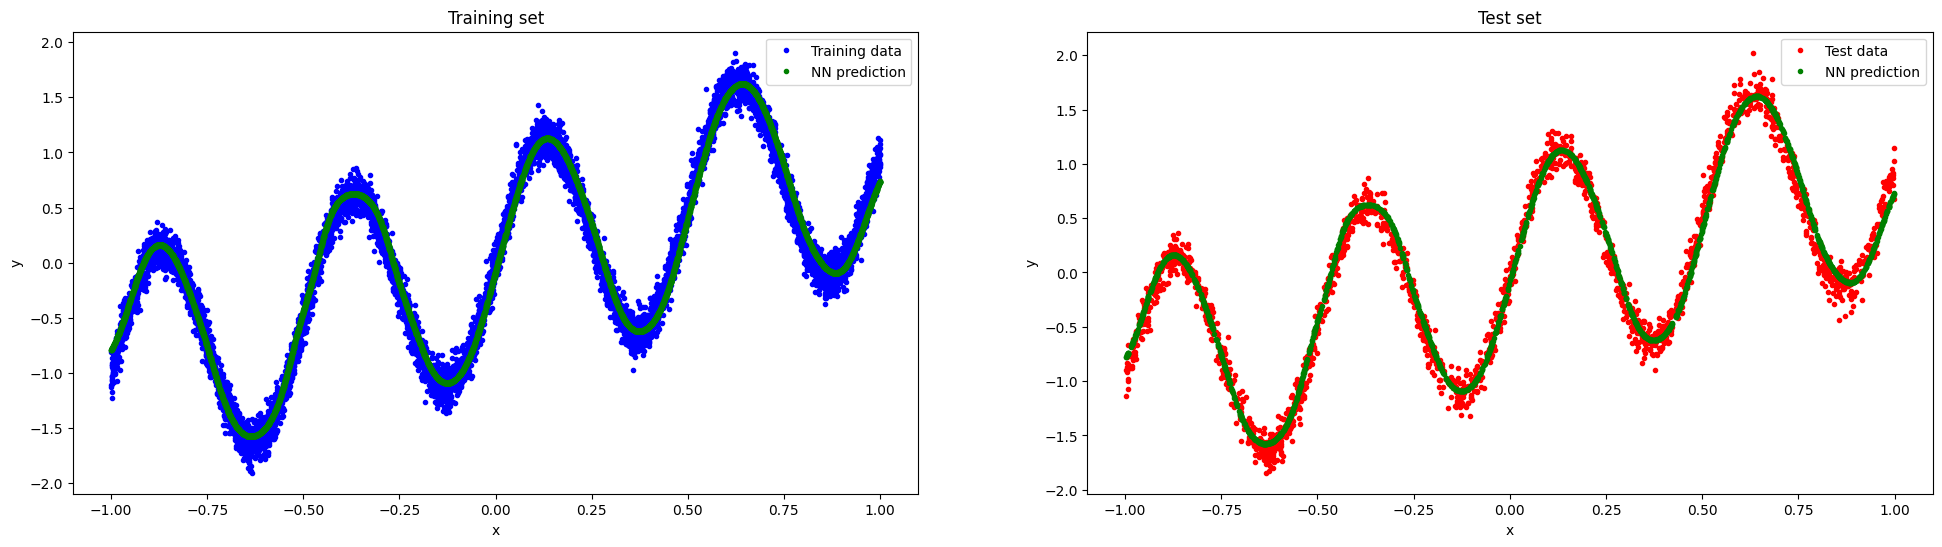

In [10]:
# Plot preidctions for training and test sets

plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
plt.plot(X_train[:,0], Y_train[:,0], "b.", label="Training data")
plt.plot(X_train[:,0], nn._compute_output(X_train)[:,0], "g.", label="NN prediction")
plt.title("Training set")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.plot(X_test[:,0], Y_test[:,0], "r.", label="Test data")
plt.plot(X_test[:,0], nn._compute_output(X_test)[:,0], "g.", label="NN prediction")
plt.title("Test set")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
